# Partial dependence plots.
*From http://scikit-learn.org/stable/auto_examples/ensemble/plot_partial_dependence.html*

Partial dependence plots show the dependence between the target function and a set of ‘target’ features, marginalizing over the values of all other features (the complement features). Due to the limits of human perception the size of the target feature set must be small (usually, one or two) thus the target features are usually chosen among the most important features.

*From https://cran.r-project.org/web/packages/datarobot/vignettes/PartialDependence.html*:


Consider an arbitrary model obtained by fitting a pparticular structure (e.g., random forest, support vector machine, or linear regression model) to a given dataset $\mathcal{D}$. This dataset includes $N$ observations $y_k$ of a response variable $y$ for $k = 1,2,\cdots,N$, along with $p$ covariates denoted $x_{i,k}$ for $i=1,2,\cdots,p$ and $k=1,2,\cdots,N$. This model generates predictions of the form:
$$\hat{y}_k = F(x_{1,k},x_{2,k},\cdots,x_{p,k})$$
for some function $F(\cdots)$. In the case of a single covariate $x_j$, Friedman's partial dependence plots are obtained by computing the following average and plotting it over a useful range of $x$ values:
$$\phi_j(x) = \frac{1}{N}\sum_{k=1}^NF(x_{1,k},\cdots,x_{j-1,k},x,x_{j+1,k},\cdots,x_{p,k})$$
The idea is that the function $\phi_j(x)$ tells us howt he value of the variable $x_j$ influences the model predictions $\hat{y}_k$ after we have "averaged out" the influence of all other variables. For linear regression models, the resulting plots are simply straight lines whose slopes are equal to the model parameters. Sepcifically, for a linear model, the prediction defined above has the form:
$$\hat{y}_k = \sum_{i=1}^p a_ix_{i,j}$$
from which it follows that the partial dependence function is
$$\phi_j(x) = a_j x + \frac{1}{N}\sum_{k=1}^N\sum_{i\ne j}a_ix_{i,k} = a_j x + \sum_{i\ne j}a_i \bar{x}_i$$
where $\bar{x}_i$ is the average value of the $i^{th}$ covariate. The main advantage of these plots is that they can be constructed for any predictive model, regardless of its form or complexity.

The multivariate extension of the partial dependence plots just described is straightforward in principle, but several practical issues arise. First and most obviously, these plots are harder to interpret: the bivariate partial dependence function $\phi_{i,j}(x,y)$ for two covariates $x_i$ and $x_j$ is defined analogously to $\phi(x)$ by averaging over all other covariates, and this function is still relatively easy to plot and visualize, but higher-dimensional extensions are problematic. Also, these multivariate partial dependence plots have been criticized as being inadequate in the face of certain strong interactions **-- more on this below**.

*Back to the sklearn example*:

This example shows how to obtain partial dependence plots from a GradientBoostingRegressor trained on the California housing dataset. The example is taken from ESL.

The plot shows four one-way and one two-way partial dependence plots. The target variables for the one-way PDP are: median income (`MedInc`), avg. occupants per household (`AvgOccup`), median house age (`HouseAge`), and avg. rooms per household (`AveRooms`).

We can clearly see that the median house price shows a linear relationship with the median income (top left) and that the house price drops when the avg. occupants per household increases (top middle). The top right plot shows that the house age in a district does not have a strong influence on the (median) house price; so does the average rooms per household. The tick marks on the x-axis represent the deciles of the feature values in the training data.

Partial dependence plots with two target features enable us to visualize interactions among them. The two-way partial dependence plot shows the dependence of median house price on joint values of house age and avg. occupants per household. We can clearly see an interaction between the two features: For an avg. occupancy greater than two, the house price is nearly independent of the house age, whereas for values less than two there is a strong dependence on age.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.datasets.california_housing import fetch_california_housing
from sklearn.linear_model import LinearRegression

cal_housing = fetch_california_housing()

# split 80/20 train-test
X_train, X_test, y_train, y_test = train_test_split(cal_housing.data,
                                                    cal_housing.target,
                                                    test_size=0.2,
                                                    random_state=1)
names = cal_housing.feature_names

print("Training GBRT...")
boring_linear.fit(X_train, y_train)
clf.fit(X_train, y_train)

Training GBRT...


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=4,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=1, subsample=1.0, verbose=0,
             warm_start=False)

In [4]:
print(cal_housing.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




In [5]:
import pandas as pd

In [6]:
pd.Series(clf.feature_importances_, index=names)

MedInc        0.198609
HouseAge      0.059052
AveRooms      0.056490
AveBedrms     0.034703
Population    0.021038
AveOccup      0.089581
Latitude      0.246344
Longitude     0.294183
dtype: float64

In [7]:
# Note latitude and longitude are "important". Let's plot.

Convenience plot with ``partial_dependence_plots``
Custom 3d plot via ``partial_dependence``


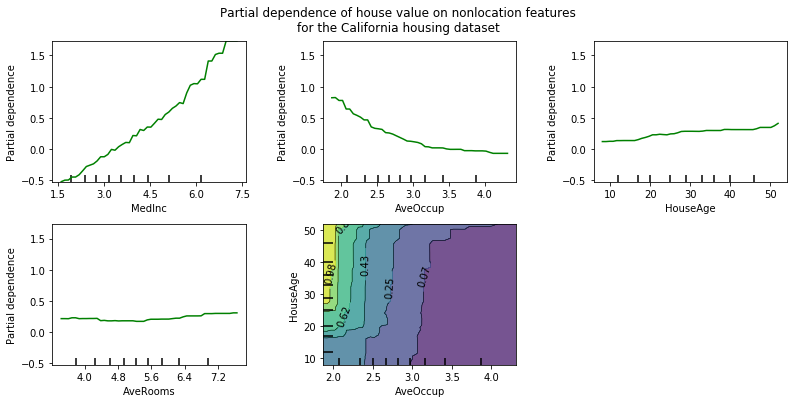

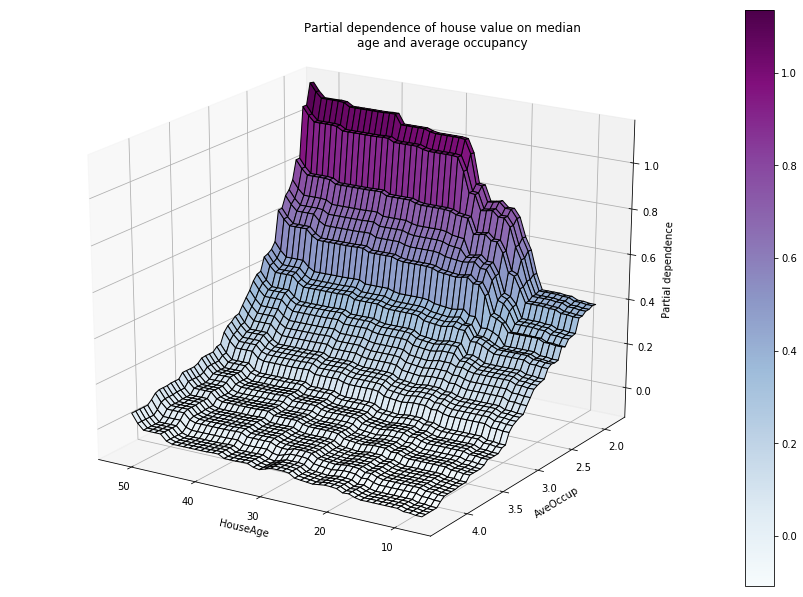

In [8]:
print('Convenience plot with ``partial_dependence_plots``')

features = [0, 5, 1, 2, (5, 1)]
fig, ax = plt.subplots(figsize=(12,6))
fig, ax = plot_partial_dependence(clf, X_train, features,
                                  feature_names=names,
                                  n_jobs=3, grid_resolution=50,
                                  ax=ax)
fig.suptitle('Partial dependence of house value on nonlocation features\n'
             'for the California housing dataset')
plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle

print('Custom 3d plot via ``partial_dependence``')
fig = plt.figure(figsize=(12,8))

target_feature = (1, 5)
pdp, axes = partial_dependence(clf, target_feature,
                               X=X_train,
                               grid_resolution=50)

XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].reshape(list(map(np.size, axes))).T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(names[target_feature[0]])
ax.set_ylabel(names[target_feature[1]])
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle('Partial dependence of house value on median\n'
             'age and average occupancy')
plt.subplots_adjust(top=0.9)

plt.show()

# When this fails

- Adapted from https://arxiv.org/pdf/1309.6392.pdf


In [ ]:
size = 10000
X1 = np.random.uniform(-1,1,size)
X2 = np.random.uniform(-1,1,size)
X3 = np.random.uniform(-1,1,size)
eps = np.random.normal(0,0.5,size)

Y = 0.2*X1 - 5*X2 + 10*X2*np.where(X3>=0,1,0) + eps

In [60]:
%matplotlib inline

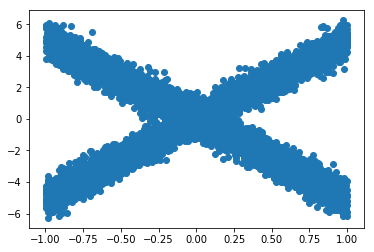

In [61]:
plt.scatter(X2,Y, color = C3)

In [62]:
Xs = np.stack([X1,X2,X3]).T

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
clf = GradientBoostingRegressor(max_depth=3)
params = {'n_estimators':[50,100,200]}
grid = GridSearchCV(clf, param_grid = params, n_jobs = 5, cv = 5)

In [65]:
grid.fit(Xs,Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=5,
       param_grid={'n_estimators': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

(-6, 6)

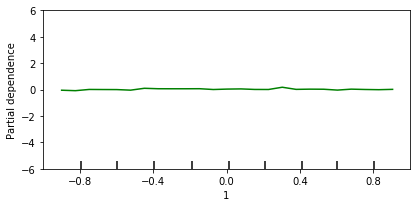

In [70]:
plot_partial_dependence(grid.best_estimator_, Xs, [1],
                        n_jobs=1, grid_resolution=25)
plt.xlim(-1,1)
plt.ylim(-6,6)

# This shows key caveat in Friedman's initial explanation of PDPs:

In general, the functional form of $\hat{F}_{z_{\setminus l}}(z_l)$ will depend on the particular values chosen for $z_{\setminus l}$. **If, however, this dependence is not to strong than the average function can represent a useful summary of the partial dependence of $\hat{F}(x)$ on the chosen variable subset $z_l$**.

In the special cases where the dependence of $\hat{F}(x)$ in $z_l$ is additive
$$\hat{F}(x) = \hat{F}_l(z_l) + \hat{F}_{\setminus l}(z_{\setminus l})$$,
or multiplicative
$$\hat{F}(x) = \hat{F}_l(z_l)\hat{F}_{\setminus l}(z_{\setminus l})$$
the *form* of $\hat{F}_{z\setminus l}(z_l)$ does not depend on the joint values of the complement varaibles $z_{\setminus l}$. Then $\bar{F}_l(z_l)$ provides a complete description of the nature of the variation of $\hat{F}(x)$ on the chosen input variable subset $z_l$.